In [53]:
import pandas as pd
import glob
HA=glob.glob('../*ha*csv')
HA

['../south_h3n2_ha.csv',
 '../north_h1n1_ha.csv',
 '../south_h1n1_ha.csv',
 '../north_h3n2_ha.csv']

In [54]:
x=HA[0].replace('../','').replace('.csv','')
df=pd.read_csv(HA[0],index_col=0)[['ldistance_Qnet_recommendation','ldistance_WHO']].rename(columns={'ldistance_Qnet_recommendation':'Q'+x,'ldistance_WHO':'W'+x})
for  x in HA[1:]:
    y=x.replace('../','').replace('.csv','')
    df=df.join(pd.read_csv(x,index_col=0)[['ldistance_Qnet_recommendation',
                                           'ldistance_WHO']].rename(columns={'ldistance_Qnet_recommendation':'Q'+y,
                                                                                                             'ldistance_WHO':'W'+y}))
df

,Qsouth_h3n2_ha,Wsouth_h3n2_ha,Qnorth_h1n1_ha,Wnorth_h1n1_ha,Qsouth_h1n1_ha,Wsouth_h1n1_ha,Qnorth_h3n2_ha,Wnorth_h3n2_ha
year,,,,,,,,
2005_2006,3,3,10,8,10,8,2,10
2006_2007,4,12,1,6,2,6,4,5
2007_2008,5,8,11,8,6,14,5,8
2008_2009,2,3,2,2,2,9,2,3
2009_2010,6,7,119,119,119,119,6,7
2010_2011,7,8,1,5,1,5,7,8
2011_2012,4,4,2,7,2,7,4,4
2012_2013,4,8,4,11,4,11,3,4
2013_2014,7,4,2,10,5,10,1,4


In [36]:
x=HA[0]
a1=pd.read_csv(x,index_col=0)[['ldistance_Qnet_recommendation','ldistance_WHO']]
x=HA[1]
a2=pd.read_csv(x,index_col=0)[['ldistance_Qnet_recommendation','ldistance_WHO']]
a1.join(a2,rsuffix=x)

,ldistance_Qnet_recommendation,ldistance_WHO,ldistance_Qnet_recommendation../north_h1n1_ha.csv,ldistance_WHO../north_h1n1_ha.csv
year,,,,
2005_2006,3,3,10,8
2006_2007,4,12,1,6
2007_2008,5,8,11,8
2008_2009,2,3,2,2
2009_2010,6,7,119,119
2010_2011,7,8,1,5
2011_2012,4,4,2,7
2012_2013,4,8,4,11
2013_2014,7,4,2,10


In [2]:
df=pd.read_csv('../north_h1n1_ha.csv')

Index(['year', 'WHO_recommendation_name', 'WHO_recommendation_sequence',
       'dominant_strain_accession', 'dominant_strain_sequence',
       'dominant_strain_accession_name', 'qdistance_recommendation_accession',
       'qdistance_recommendation_sequence',
       'qdistance_recommendation_accession_name', 'ldistance_WHO',
       'ldistance_Qnet_recommendation', 'qnet_sample_size'],
      dtype='object')

In [3]:
xf=df[['ldistance_Qnet_recommendation','ldistance_WHO']]
dx=xf.diff(axis=1).iloc[:,1]
mx=dx.mean()
sx=dx.std()
zx=(dx-mx)/sx
# H0: dx==0
print(zx.mean())

1.0092936587501423e-16


In [4]:
import pylab as plt
plt.style.use('dark_background')
#zx.hist()

In [5]:
import numpy as np
F=2
print(mx - F*sx/(np.sqrt(dx.index.size)),mx,mx + F*sx/(np.sqrt(dx.index.size)))

1.5443725626546811 3.727272727272727 5.910172891890773


In [6]:
xf

,ldistance_Qnet_recommendation,ldistance_WHO
0,6,4
1,1,3
2,2,5
3,4,7
4,10,8
5,1,6
6,11,8
7,2,2
8,119,119
9,1,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7cfb66a50>]],
      dtype=object)

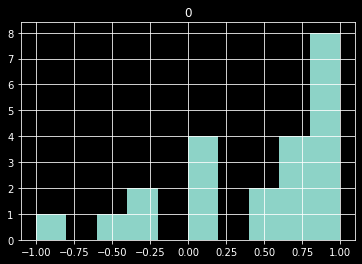

In [7]:
wf=xf.iloc[:,1].values
qf=xf.iloc[:,0].values
lf=pd.DataFrame(((wf-qf)/wf)).replace(-np.inf,np.nan)#.dropna().mean()
lf.hist()

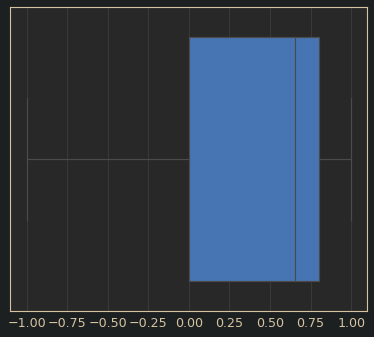

In [23]:
import seaborn as sns
sns.boxplot(lf.values)

In [8]:
from distfit import distfit
#import distfit

In [19]:
dist = distfit(smooth=5)

# Search for best theoretical fit on your empirical data
dist.fit_transform(lf.values)

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [0.00 sec] [RSS: 30.8625211] [loc=0.396 scale=0.541]
[distfit] >[expon     ] [0.00 sec] [RSS: 40.5972817] [loc=-1.000 scale=1.396]
[distfit] >[pareto    ] [0.10 sec] [RSS: 39.9730344] [loc=-37620329.610 scale=37620328.610]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 27.7647888] [loc=0.305 scale=0.551]
[distfit] >[t         ] [0.09 sec] [RSS: 30.8626483] [loc=0.396 scale=0.541]
[distfit] >[genextreme] [0.17 sec] [RSS: 30.7054201] [loc=0.150 scale=0.920]
[distfit] >[gamma     ] [0.09 sec] [RSS: 31.4333399] [loc=-8.009 scale=0.037]
[distfit] >[lognorm   ] [0.17 sec] [RSS: 30.8569432] [loc=-301.467 scale=301.864]
[distfit] >[beta      ] [0.10 sec] [RSS: 34.9285589] [loc=-1.257 scale=2.257]
[distfit] >[uniform   ] [0.00 sec] [RSS: 36.1615882] [loc=-1.000 scale=2.000]
[distfit] >[loggamma  ] [0.04 sec] [RSS: 30.4987824] [loc=1.000 scale=0.000]
[distfit] >Compute confidence interval [parame

{'model': {'distr': <scipy.stats._continuous_distns.dweibull_gen at 0x7fb7c1e3a090>,
  'stats': 'RSS',
  'params': (2.0464728648309336, 0.30498336835645823, 0.5513000686134905),
  'name': 'dweibull',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fb7c02bd390>,
  'score': 27.76478877658162,
  'loc': 0.30498336835645823,
  'scale': 0.5513000686134905,
  'arg': (2.0464728648309336,),
  'CII_min_alpha': -0.5236895690250335,
  'CII_max_alpha': 1.1336563057379498},
 'summary':          distr      score  LLE              loc            scale  \
 0     dweibull  27.764789  NaN         0.304983           0.5513   
 1     loggamma  30.498782  NaN         1.000018         0.000001   
 2   genextreme   30.70542  NaN         0.150086         0.920262   
 3      lognorm  30.856943  NaN      -301.467322       301.863753   
 4         norm  30.862521  NaN         0.395971         0.540832   
 5            t  30.862648  NaN         0.395966         0.540828   
 6        gamma   31.43334 

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb7c020be50>)

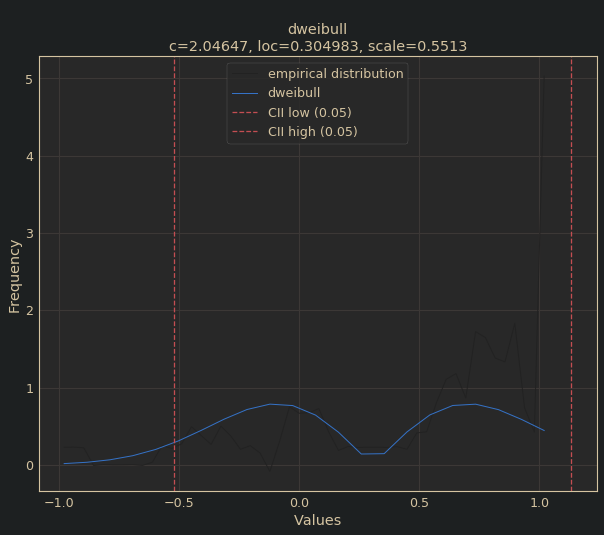

In [20]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
#plt.style.use('dark_background')
dist.plot()

In [60]:
dist.summary

,distr,score,LLE,loc,scale,arg
0,loggamma,47.105813,NaN,1.000018,0.000001,"(1.0492975506710348e-06,)"
